## **Dataset**: Creation

### Importation des **librairies** et des variables nécessaires

In [4]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

### Création d'ensembles de données à partir des deux originaux

In [6]:
df_t_path = r"C:\Users\marco\OneDrive\Desktop\TXTgeneration\Dataset\Trump_tweets.csv"
df_s_path = r"C:\Users\marco\OneDrive\Desktop\TXTgeneration\Dataset\Shakespeare_data.csv"

In [7]:
df_t = pd.read_csv(df_t_path)
df_s = pd.read_csv(df_s_path)

In [11]:
df_t['Author'] = 'Trump'
df_s['Author'] = 'Shakespeare'

In [15]:
columns_t = ['Tweet_Text', 'Author']
columns_s = ['PlayerLine', 'Author']

In [16]:
df_t_2 = df_t[columns_t]
df_s_2 = df_s[columns_s]

In [21]:
df = pd.merge(df_t_2, df_s_2, on='Author', how='outer')

In [28]:
df['Text'] = df['Tweet_Text'].combine_first(df['PlayerLine'])
df = df.drop(columns=['Tweet_Text', 'PlayerLine'])

In [30]:
df.to_csv('Dataset.csv', index=False)

## **Dataset**: Balancing et Exploration

### **Exploration**

In [47]:
#Nous calculons le pourcentage de lignes pour chaque auteur
author_counts = df['Author'].value_counts(normalize=True) * 100

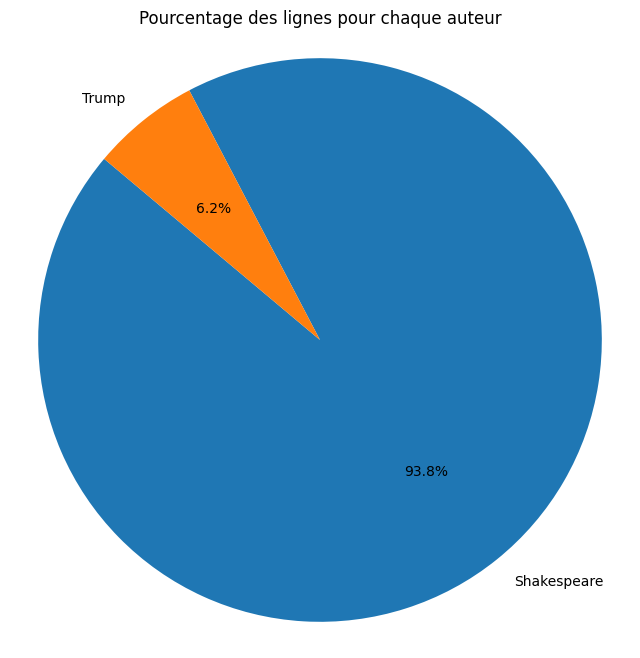

In [32]:
#Visualization
plt.figure(figsize=(8, 8))
plt.pie(author_counts, labels=author_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pourcentage des lignes pour chaque auteur')
plt.axis('equal')
plt.show()

### Dataset **Integration**

Étant donné qu'il existe une **disparité évidente entre Shakespeare et Trump**, nous avons intégré un ensemble de données supplémentaire contenant des **discours de rallye** ainsi que des tweets normaux.

In [88]:
df = pd.read_csv(r"C:\Users\marco\OneDrive\Desktop\TXTgeneration\Dataset\Dataset.csv")

In [89]:
df_ex_path = r"C:\Users\marco\OneDrive\Desktop\TXTgeneration\Dataset\dataset_extra.csv"

In [90]:
df_ex = pd.read_csv(df_ex_path)

In [91]:
df_ex = df_ex.drop(columns=['Unnamed: 0'])

In [92]:
df = df.merge(df_ex, on=['Author', 'Text'], how='outer')

In [93]:
df

,Author,Text
0,Trump,Today we express our deepest gratitude to all ...
1,Trump,Busy day planned in New York. Will soon be mak...
2,Trump,Love the fact that the small groups of protest...
3,Trump,Just had a very open and successful presidenti...
4,Trump,A fantastic day in D.C. Met with President Oba...
...,...,...
118801,Trump,"Thank you, thank you. So we begin, Oklahoma, w..."
118802,Trump,"ell, thank you very much. And hello, Tupelo. T..."
118803,Trump,Thank you. Thank you. I love New Jersey and I'...
118804,Trump,"Well, thank you very much. Thank you. Thank yo..."


### Dataset: **Balancing**

In [52]:
nlp = spacy.load("en_core_web_md")

In [54]:
def count_words(text):
    doc = nlp(text)
    return len(doc)

Les types de textes étant différents, on calcule le nombre moyen de mots avec SpaCy pour chacun des textes considérés, puis je les regroupe par auteur, **obtenant ainsi le nombre moyen de mots par texte pour chacun des deux auteurs**

In [56]:
# Applique la fonction count_words à la colonne 'text' pour obtenir le nombre de mots pour chaque texte
df['word_count'] = df['Text'].apply(count_words)

# Calcule la moyenne des mots par auteur
avg_word_count_by_author = df.groupby('Author')['word_count'].mean()

# Affiche les résultats
print(avg_word_count_by_author)

Author
Shakespeare     9.049607
Trump          84.183671
Name: word_count, dtype: float64


Étant donné le nombre moyen de mots, on cherche le **pourcentage nécessaire de textes de Shakespeare à conserver pour obtenir un ensemble de données équilibré.**

In [57]:
# Nombre moyen de mots par auteur
avg_word_count = {
    'Shakespeare': 9.049607,
    'Trump': 84.183671
}

# Pourcentage de Trump dans le dataset
percent_trump = 6.2 / 100

# Calcul de la différence entre le nombre moyen de mots par auteur
word_count_diff = avg_word_count['Trump'] - avg_word_count['Shakespeare']

# Calcul du pourcentage de textes de Shakespeare dans le dataset
percent_shakespeare = 1 - percent_trump

# Calcul du pourcentage de textes de Shakespeare nécessaires pour équilibrer
percent_balance = percent_shakespeare * (1 - (word_count_diff / avg_word_count['Trump']))

# Conversion du pourcentage au format pourcentage
percent_balance *= 100

# Affichage du résultat
print(f"Pourcentage de textes de Shakespeare nécessaires pour équilibrer : {percent_balance:.2f}%")

Pourcentage de textes de Shakespeare nécessaires pour équilibrer : 10.08%


**On réajuste mon dataframe en laissant le pourcentage**, qui reste quelque peu biaisé en faveur de Shakespeare afin de maintenir également la variété du discours de ses personnages

In [94]:
# Calculer la proportion actuelle de textes de Shakespeare dans le DataFrame
total_texts = len(df)  # Nombre total de textes dans le DataFrame
shakespeare_texts = len(df[df['Author'] == 'Shakespeare'])  # Nombre de textes de Shakespeare
percent_shakespeare_current = (shakespeare_texts / total_texts) * 100

# Comparer avec la proportion cible
percent_difference = 19.08 - percent_shakespeare_current

# Si la différence est négative, vous devez supprimer des textes de Shakespeare
if percent_difference < 0:
    # Nombre de textes de Shakespeare à supprimer pour atteindre l'équilibre
    num_texts_to_remove = int(abs(percent_difference / 100 * total_texts))
    
    # Supprimer des textes de Shakespeare du DataFrame pour atteindre l'équilibre
    shakespeare_indices = df[df['Author'] == 'Shakespeare'].index
    texts_to_remove_indices = shakespeare_indices[:num_texts_to_remove]
    df = df.drop(texts_to_remove_indices)

# Afficher la proportion actuelle et la différence
print(f"Proportion actuelle de textes de Shakespeare : {percent_shakespeare_current:.2f}%")
print(f"Différence par rapport à la proportion cible : {percent_difference:.2f}%")

Proportion actuelle de textes de Shakespeare : 93.76%
Différence par rapport à la proportion cible : -74.68%


Sauvegarde du jeu de données

In [95]:
df

,Author,Text
0,Trump,Today we express our deepest gratitude to all ...
1,Trump,Busy day planned in New York. Will soon be mak...
2,Trump,Love the fact that the small groups of protest...
3,Trump,Just had a very open and successful presidenti...
4,Trump,A fantastic day in D.C. Met with President Oba...
...,...,...
118801,Trump,"Thank you, thank you. So we begin, Oklahoma, w..."
118802,Trump,"ell, thank you very much. And hello, Tupelo. T..."
118803,Trump,Thank you. Thank you. I love New Jersey and I'...
118804,Trump,"Well, thank you very much. Thank you. Thank yo..."


In [101]:
df.to_csv('Balanced_dataset.csv', index=False)

## **Dataset**: Train_Test_Split

In [1]:
from sklearn.model_selection import train_test_split

In [2]:
dataset_path = r"C:\Users\marco\OneDrive\Desktop\TXTgeneration\Dataset\Balanced_dataset.csv"
folder_path = r"C:\Users\marco\OneDrive\Desktop\TXTgeneration\Dataset"

In [6]:
# Lire le dataset à partir du fichier CSV
df = pd.read_csv(dataset_path)

# Séparons les caractéristiques de la cible
X = df.drop(columns='Author')
y = df['Author']

# Première division : 85% pour train+validation et 15% pour test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Deuxième division : 85% obtenu est divisé en 70% pour train et 15% pour validation (15/85 = 0.1765)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

# Créer les DataFrame pour chaque ensemble
train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Sauvegarder les fichiers CSV aux emplacements respectifs
train_path = os.path.join(folder_path, 'train.csv')
val_path = os.path.join(folder_path, 'validation.csv')
test_path = os.path.join(folder_path, 'test.csv')

train_df.to_csv(train_path, index=False)
val_df.to_csv(val_path, index=False)
test_df.to_csv(test_path, index=False)